## Random Forest Classifier CAT_DOG

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
! pip install graphviz

In [3]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [4]:
# Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# Load libraries
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# from sklearn.model_selection import train_test_split # Import train_test_split function
# from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [36]:
# load the datatset dog and cat
from Animal_Adoption.preproc.data_cat_or_dog import get_data
df= get_data('Cat')

KeyError: "['animal_type_x', 'breed_x', 'color_y', 'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)', 'intake_datetime', 'time_in_shelter_days', 'sex_y', 'breed_y'] not in index"

In [6]:
df.drop('time_in_shelter_days', axis=1, inplace=True)

/tmp/ipykernel_14305/2273787109.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


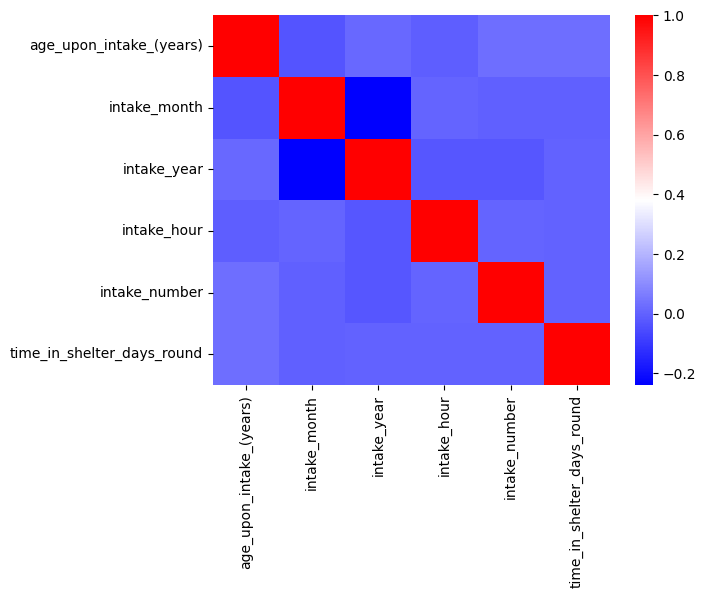

In [7]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = df.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [8]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

In [9]:
# Computing the absolute correlation
corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

# Showing the top 5 most correlated pairs of feature
corr_df.sort_values(by="absolute_correlation", ascending=False).head(5*2)

,feature_1,feature_2,correlation,absolute_correlation
8,intake_month,intake_year,-0.239546,0.239546
13,intake_year,intake_month,-0.239546,0.239546
1,age_upon_intake_(years),intake_month,-0.032277,0.032277
6,intake_month,age_upon_intake_(years),-0.032277,0.032277
20,intake_hour,intake_year,-0.030885,0.030885
15,intake_year,intake_hour,-0.030885,0.030885
30,time_in_shelter_days_round,age_upon_intake_(years),0.030216,0.030216
5,age_upon_intake_(years),time_in_shelter_days_round,0.030216,0.030216
26,intake_number,intake_year,-0.029155,0.029155
16,intake_year,intake_number,-0.029155,0.029155


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74870 entries, 0 to 79671
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   animal_id_outcome                    74870 non-null  object        
 1   date_of_birth                        74870 non-null  datetime64[ns]
 2   outcome_type                         74870 non-null  object        
 3   sex_upon_outcome                     74870 non-null  object        
 4   age_upon_intake                      74870 non-null  object        
 5   animal_id_intake                     74870 non-null  object        
 6   animal_type                          74870 non-null  object        
 7   breed                                74870 non-null  object        
 8   color                                74870 non-null  object        
 9   intake_condition                     74870 non-null  object        
 10  intake_typ

## Vizualisation

In [11]:
# # pairplot with hue sex
# sns.pairplot(df, hue ='sex')
# # to show
# plt.show()

In [12]:
# # pairplot with hue sex
# sns.pairplot(df, hue ='time_in_shelter_days_round')
# # to show
# plt.show()

## Balanced data check

In [13]:
#balenced dataset for the column 'age_upon_intake_(years)'
# relable the column 'age_upon_intake_(years)'
df['age_upon_intake_(years)'].value_counts()

1.000000     12351
2.000000     10682
0.082192      7419
3.000000      4935
0.164384      3975
4.000000      2995
5.000000      2701
0.076712      2501
0.057534      2261
0.328767      2000
0.246575      1900
6.000000      1841
0.410959      1697
7.000000      1567
0.038356      1546
8.000000      1514
0.493151      1311
0.019178      1172
0.739726      1162
10.000000     1149
0.575342      1120
0.657534       872
9.000000       863
0.821918       700
12.000000      590
0.904110       516
11.000000      449
0.000000       408
13.000000      378
0.008219       341
0.002740       332
0.005479       270
14.000000      249
15.000000      212
0.095890       199
0.016438       183
0.010959       171
0.013699       118
16.000000      106
17.000000       59
18.000000       26
19.000000       13
20.000000       12
22.000000        4
Name: age_upon_intake_(years), dtype: int64

In [14]:
#balenced dataset for the column 'intake_condition_2classes'
df['intake_condition_2classes'].value_counts()

normal        66962
not normal     7861
Name: intake_condition_2classes, dtype: int64

In [15]:
#balenced dataset for the column 'sex'
df['sex'].value_counts()

Male       37533
Female     34519
Unknown     2818
Name: sex, dtype: int64

In [16]:
#balenced dataset for the column 'sex_type'
df['sex_type'].value_counts()

Neutered    53631
Intact      18421
Unknown      2818
Name: sex_type, dtype: int64

In [17]:
#balenced dataset for the column 'animal_type'
df['animal_type'].value_counts()

Dog    45350
Cat    29520
Name: animal_type, dtype: int64

In [18]:
#balenced dataset for the column 'breed_2classes'
df['breed_2classes'].value_counts()

mixed        71581
not mixed     3289
Name: breed_2classes, dtype: int64

In [19]:
#balenced dataset for the column 'color_3classes'
df['color_3classes'].value_counts()

Monocolor    39716
Bicolor      31243
Tricolor      3911
Name: color_3classes, dtype: int64

In [20]:
#balenced dataset for the column 'outcome_type_2classes'
df['outcome_type_2classes'].value_counts()

adopted        56548
not adopted    18322
Name: outcome_type_2classes, dtype: int64

In [21]:
#balenced dataset for the column 'outcome_type_2classes'
df['time_in_shelter_days_round_5classes'].value_counts()

between 1 and 5 days      29492
between 6 and 10 days     12233
higher than 30 days       11591
several hours              9869
between 11 and 15 days     5295
between 16 and 20 days     2665
between 21 and 25 days     2002
between 26 and 30 days     1723
Name: time_in_shelter_days_round_5classes, dtype: int64

## TRAIN_TEST_DATASET

In [22]:
# I have to scale them? 

# Split the data into features (X) and target (y)

X = df[['intake_condition_2classes', 'sex', 'sex_type',\
    'animal_type', 'breed_2classes', 'age_upon_intake_(years)', 'color_3classes',\
    'outcome_type_2classes']]
y = df['time_in_shelter_days_round_5classes'] # next one with 'time_in_shelter_days_round_5classes', 'time_in_shelter_days_round_2classes'


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# recode the target in 'long' and 'not long'
# data['time_in_shelter_bins'] = pd.cut(x = data['time_in_shelter_days_round'],
#                                  bins=[data['time_in_shelter_days_round'].min()-1,
#                                        data['time_in_shelter_days_round'].mean(),
#                                        data['time_in_shelter_days_round'].max()+1], 
#                                  labels=['not long', 'long'])

# data.head()

## Pipeline - preprocessor

In [24]:
# create a list of numerical columns and categorical columns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = ['age_upon_intake_(years)']

categorical_features = ['intake_condition_2classes', 'sex', 'sex_type',\
    'animal_type', 'breed_2classes', 'color_3classes',\
    'outcome_type_2classes']

# create the transformer for numerical columns
numeric_transformer = make_pipeline(StandardScaler())

# create the transformer for categorical columns
categorical_transformer = make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore'))


# use ColumnTransformer to specify which columns need to be preprocessed in what way
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [25]:
 # Visualizing Pipelines in HTML
from sklearn import set_config; set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age_upon_intake_(years)']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['intake_condition_2classes', 'sex',
                                  'sex_type', 'animal_type', 'breed_2classes',
                                  'color_3classes', 'outcome_type_2classes'])])

In [26]:
X_train_transformed = preprocessor.fit_transform(X_train)

print("Original training set")
display(X_train.head(3))

print("Preprocessed training set")
display(pd.DataFrame(X_train_transformed).head(3))

/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Original training set


,intake_condition_2classes,sex,sex_type,animal_type,breed_2classes,age_upon_intake_(years),color_3classes,outcome_type_2classes
72128,not normal,Female,Intact,Cat,mixed,0.082192,Bicolor,adopted
24778,normal,Female,Neutered,Dog,mixed,4.000000,Bicolor,not adopted
62824,normal,Female,Neutered,Cat,mixed,2.000000,Monocolor,adopted


Preprocessed training set


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.703488,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.624207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.053567,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
# Get your features' names
preprocessor.get_feature_names_out()

array(['num__age_upon_intake_(years)',
       'cat__intake_condition_2classes_normal',
       'cat__intake_condition_2classes_not normal',
       'cat__intake_condition_2classes_nan', 'cat__sex_Female',
       'cat__sex_Male', 'cat__sex_Unknown', 'cat__sex_type_Intact',
       'cat__sex_type_Neutered', 'cat__sex_type_Unknown',
       'cat__animal_type_Cat', 'cat__animal_type_Dog',
       'cat__breed_2classes_mixed', 'cat__breed_2classes_not mixed',
       'cat__color_3classes_Bicolor', 'cat__color_3classes_Monocolor',
       'cat__color_3classes_Tricolor',
       'cat__outcome_type_2classes_adopted',
       'cat__outcome_type_2classes_not adopted'], dtype=object)

In [28]:
pd.DataFrame(
    X_train_transformed, 
    columns=preprocessor.get_feature_names_out()
).head()

,num__age_upon_intake_(years),cat__intake_condition_2classes_normal,cat__intake_condition_2classes_not normal,cat__intake_condition_2classes_nan,cat__sex_Female,cat__sex_Male,cat__sex_Unknown,cat__sex_type_Intact,cat__sex_type_Neutered,cat__sex_type_Unknown,cat__animal_type_Cat,cat__animal_type_Dog,cat__breed_2classes_mixed,cat__breed_2classes_not mixed,cat__color_3classes_Bicolor,cat__color_3classes_Monocolor,cat__color_3classes_Tricolor,cat__outcome_type_2classes_adopted,cat__outcome_type_2classes_not adopted
0,-0.703488,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.624207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.053567,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.705345,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.624207,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## PIPELINE

In [29]:
pipeline = make_pipeline(preprocessor, RandomForestClassifier())
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['intake_condition_2classes',
                                                   'sex', 'sex_type',
                                                   'animal_type',
                                                   'breed_2classes',
                                                   'color_3classes',
                                                   'outcome_type_2classes'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [30]:
pipeline.fit(X_train,y_train)

/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age_upon_intake_(years)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['intake_condition_2classes',
                                                   'sex', 'sex_type',
                                                   'animal_type',
                                                   'breed_2classes',
                                                   'color_3classes',
                                                   'outcome_type_2classes'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [31]:
pipeline.predict(X_test)

array(['between 1 and 5 days', 'between 1 and 5 days',
       'between 1 and 5 days', ..., 'between 1 and 5 days',
       'between 1 and 5 days', 'between 1 and 5 days'], dtype=object)

## Accuracy

In [32]:
pipeline.score(X_test,y_test)

0.4842393482035528

## Cross_validation

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
mean_accuracy = scores.mean()

/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/wiesemann/.pyenv/versions/3.10.6/envs/animals/lib/python3.10/

In [34]:
mean_accuracy

0.4815179917666155

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'y_pred' is not defined

In [ ]:
#Hyperparameter Tuning
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

## GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipeline, 
    param_grid={
        # Access any component of the Pipeline
        # and any available hyperparamater you want to optimize
        # has to be in the pipeline ## Parameters of the Decision Tree
        # only for the parametgers of the model
        'strategy': ['mean', 'median'],
        #'alpha': [0.1, 0.5, 1, 5, 10]
    },
    cv=5,
    scoring=["accuracy", 'precision', 'recall'])

grid_search.fit(X_train, y_train)

grid_search.best_params_

ValueError: For multi-metric scoring, the parameter refit must be set to a scorer key or a callable to refit an estimator with the best parameter setting on the whole data and make the best_* attributes available for that metric. If this is not needed, refit should be set to False explicitly. True was passed.

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [ ]:
# Define the features and target variable
features = ['age_upon_intake_(years)', 'animal_type', 'breed',
            'intake_condition', 'sex', 'sex_type', 'color']

target = 'time_in_shelter_days'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
## split the datatset into -> animal_type-> Cat and Dog
 